In [ ]:
### BACE affinity predictor: random forest, random train/validate/test splits, representation = ECFPs?

In [1]:
###load data from CSV in same folder as notebook
from deepchem.utils.save import load_from_disk
dataset_file= "./bace.csv"
dataset = load_from_disk(dataset_file)
print("Columns of dataset: %s" % str(dataset.columns.values))
print("Number of examples in dataset: %s" % str(dataset.shape[0]))

Columns of dataset: ['mol' 'CID' 'Class' 'Model' 'pIC50' 'MW' 'AlogP' 'HBA' 'HBD' 'RB'
 'HeavyAtomCount' 'ChiralCenterCount' 'ChiralCenterCountAllPossible'
 'RingCount' 'PSA' 'Estate' 'MR' 'Polar' 'sLi_Key' 'ssBe_Key'
 'ssssBem_Key' 'sBH2_Key' 'ssBH_Key' 'sssB_Key' 'ssssBm_Key' 'sCH3_Key'
 'dCH2_Key' 'ssCH2_Key' 'tCH_Key' 'dsCH_Key' 'aaCH_Key' 'sssCH_Key'
 'ddC_Key' 'tsC_Key' 'dssC_Key' 'aasC_Key' 'aaaC_Key' 'ssssC_Key'
 'sNH3_Key' 'sNH2_Key' 'ssNH2_Key' 'dNH_Key' 'ssNH_Key' 'aaNH_Key'
 'tN_Key' 'sssNH_Key' 'dsN_Key' 'aaN_Key' 'sssN_Key' 'ddsN_Key' 'aasN_Key'
 'ssssN_Key' 'daaN_Key' 'sOH_Key' 'dO_Key' 'ssO_Key' 'aaO_Key' 'aOm_Key'
 'sOm_Key' 'sF_Key' 'sSiH3_Key' 'ssSiH2_Key' 'sssSiH_Key' 'ssssSi_Key'
 'sPH2_Key' 'ssPH_Key' 'sssP_Key' 'dsssP_Key' 'ddsP_Key' 'sssssP_Key'
 'sSH_Key' 'dS_Key' 'ssS_Key' 'aaS_Key' 'dssS_Key' 'ddssS_Key'
 'ssssssS_Key' 'Sm_Key' 'sCl_Key' 'sGeH3_Key' 'ssGeH2_Key' 'sssGeH_Key'
 'ssssGe_Key' 'sAsH2_Key' 'ssAsH_Key' 'sssAs_Key' 'dsssAs_Key' 'ddsAs_Key'
 'sssssAs_

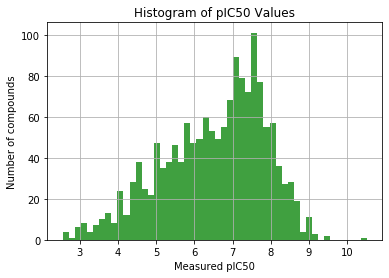

In [2]:
###plot histogram of data to show distribution
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

pIC50s = np.array(dataset["pIC50"])
n, bins, patches = plt.hist(pIC50s, 50, facecolor='green', alpha=0.75)
plt.xlabel('Measured pIC50')
plt.ylabel('Number of compounds')
plt.title(r'Histogram of pIC50 Values')
plt.grid(True)
plt.show()

In [3]:
###featurize the data using extended connectivity fingerprints
import deepchem as dc

#user_specified_features = ['MW','AlogP','HBA','HBD','RB','HeavyAtomCount','ChiralCenterCount','ChiralCenterCountAllPossible','RingCount','PSA','Estate','MR','Polar','sLi_Key','ssBe_Key','ssssBem_Key','sBH2_Key','ssBH_Key','sssB_Key','ssssBm_Key','sCH3_Key','dCH2_Key','ssCH2_Key','tCH_Key','dsCH_Key','aaCH_Key','sssCH_Key','ddC_Key','tsC_Key','dssC_Key','aasC_Key','aaaC_Key','ssssC_Key','sNH3_Key','sNH2_Key','ssNH2_Key','dNH_Key','ssNH_Key','aaNH_Key','tN_Key','sssNH_Key','dsN_Key','aaN_Key','sssN_Key','ddsN_Key','aasN_Key','ssssN_Key','daaN_Key','sOH_Key','dO_Key','ssO_Key','aaO_Key','aOm_Key','sOm_Key','sF_Key','sSiH3_Key','ssSiH2_Key','sssSiH_Key','ssssSi_Key','sPH2_Key','ssPH_Key','sssP_Key','dsssP_Key','ddsP_Key','sssssP_Key','sSH_Key','dS_Key','ssS_Key','aaS_Key','dssS_Key','ddssS_Key','ssssssS_Key','Sm_Key','sCl_Key','sGeH3_Key','ssGeH2_Key','sssGeH_Key','ssssGe_Key','sAsH2_Key','ssAsH_Key','sssAs_Key','dsssAs_Key','ddsAs_Key','sssssAs_Key','sSeH_Key','dSe_Key','ssSe_Key','aaSe_Key','dssSe_Key','ssssssSe_Key','ddssSe_Key','sBr_Key','sSnH3_Key','ssSnH2_Key','sssSnH_Key','ssssSn_Key','sI_Key','sPbH3_Key','ssPbH2_Key','sssPbH_Key','ssssPb_Key','sLi_Cnt','ssBe_Cnt','ssssBem_Cnt','sBH2_Cnt','ssBH_Cnt','sssB_Cnt','ssssBm_Cnt','sCH3_Cnt','dCH2_Cnt','ssCH2_Cnt','tCH_Cnt','dsCH_Cnt','aaCH_Cnt','sssCH_Cnt','ddC_Cnt','tsC_Cnt','dssC_Cnt','aasC_Cnt','aaaC_Cnt','ssssC_Cnt','sNH3_Cnt','sNH2_Cnt','ssNH2_Cnt','dNH_Cnt','ssNH_Cnt','aaNH_Cnt','tN_Cnt','sssNH_Cnt','dsN_Cnt','aaN_Cnt','sssN_Cnt','ddsN_Cnt','aasN_Cnt','ssssN_Cnt','daaN_Cnt','sOH_Cnt','dO_Cnt','ssO_Cnt','aaO_Cnt','aOm_Cnt','sOm_Cnt','sF_Cnt','sSiH3_Cnt','ssSiH2_Cnt','sssSiH_Cnt','ssssSi_Cnt','sPH2_Cnt','ssPH_Cnt','sssP_Cnt','dsssP_Cnt','ddsP_Cnt','sssssP_Cnt','sSH_Cnt','dS_Cnt','ssS_Cnt','aaS_Cnt','dssS_Cnt','ddssS_Cnt','ssssssS_Cnt','Sm_Cnt','sCl_Cnt','sGeH3_Cnt','ssGeH2_Cnt','sssGeH_Cnt','ssssGe_Cnt','sAsH2_Cnt','ssAsH_Cnt','sssAs_Cnt','dsssAs_Cnt','ddsAs_Cnt','sssssAs_Cnt','sSeH_Cnt','dSe_Cnt','ssSe_Cnt','aaSe_Cnt','dssSe_Cnt','ssssssSe_Cnt','ddssSe_Cnt','sBr_Cnt','sSnH3_Cnt','ssSnH2_Cnt','sssSnH_Cnt','ssssSn_Cnt','sI_Cnt','sPbH3_Cnt','ssPbH2_Cnt','sssPbH_Cnt','ssssPb_Cnt','sLi_Sum','ssBe_Sum','ssssBem_Sum','sBH2_Sum','ssBH_Sum','sssB_Sum','ssssBm_Sum','sCH3_Sum','dCH2_Sum','ssCH2_Sum','tCH_Sum','dsCH_Sum','aaCH_Sum','sssCH_Sum','ddC_Sum','tsC_Sum','dssC_Sum','aasC_Sum','aaaC_Sum','ssssC_Sum','sNH3_Sum','sNH2_Sum','ssNH2_Sum','dNH_Sum','ssNH_Sum','aaNH_Sum','tN_Sum','sssNH_Sum','dsN_Sum','aaN_Sum','sssN_Sum','ddsN_Sum','aasN_Sum','ssssN_Sum','daaN_Sum','sOH_Sum','dO_Sum','ssO_Sum','aaO_Sum','aOm_Sum','sOm_Sum','sF_Sum','sSiH3_Sum','ssSiH2_Sum','sssSiH_Sum','ssssSi_Sum','sPH2_Sum','ssPH_Sum','sssP_Sum','dsssP_Sum','ddsP_Sum','sssssP_Sum','sSH_Sum','dS_Sum','ssS_Sum','aaS_Sum','dssS_Sum','ddssS_Sum','ssssssS_Sum','Sm_Sum','sCl_Sum','sGeH3_Sum','ssGeH2_Sum','sssGeH_Sum','ssssGe_Sum','sAsH2_Sum','ssAsH_Sum','sssAs_Sum','dsssAs_Sum','ddsAs_Sum','sssssAs_Sum','sSeH_Sum','dSe_Sum','ssSe_Sum','aaSe_Sum','dssSe_Sum','ssssssSe_Sum','ddssSe_Sum','sBr_Sum','sSnH3_Sum','ssSnH2_Sum','sssSnH_Sum','ssssSn_Sum','sI_Sum','sPbH3_Sum','ssPbH2_Sum','sssPbH_Sum','ssssPb_Sum','sLi_Avg','ssBe_Avg','ssssBem_Avg','sBH2_Avg','ssBH_Avg','sssB_Avg','ssssBm_Avg','sCH3_Avg','dCH2_Avg','ssCH2_Avg','tCH_Avg','dsCH_Avg','aaCH_Avg','sssCH_Avg','ddC_Avg','tsC_Avg','dssC_Avg','aasC_Avg','aaaC_Avg','ssssC_Avg','sNH3_Avg','sNH2_Avg','ssNH2_Avg','dNH_Avg','ssNH_Avg','aaNH_Avg','tN_Avg','sssNH_Avg','dsN_Avg','aaN_Avg','sssN_Avg','ddsN_Avg','aasN_Avg','ssssN_Avg','daaN_Avg','sOH_Avg','dO_Avg','ssO_Avg','aaO_Avg','aOm_Avg','sOm_Avg','sF_Avg','sSiH3_Avg','ssSiH2_Avg','sssSiH_Avg','ssssSi_Avg','sPH2_Avg','ssPH_Avg','sssP_Avg','dsssP_Avg','ddsP_Avg','sssssP_Avg','sSH_Avg','dS_Avg','ssS_Avg','aaS_Avg','dssS_Avg','ddssS_Avg','ssssssS_Avg','Sm_Avg','sCl_Avg','sGeH3_Avg','ssGeH2_Avg','sssGeH_Avg','ssssGe_Avg','sAsH2_Avg','ssAsH_Avg','sssAs_Avg','dsssAs_Avg','ddsAs_Avg','sssssAs_Avg','sSeH_Avg','dSe_Avg','ssSe_Avg','aaSe_Avg','dssSe_Avg','ssssssSe_Avg','ddssSe_Avg','sBr_Avg','sSnH3_Avg','ssSnH2_Avg','sssSnH_Avg','ssssSn_Avg','sI_Avg','sPbH3_Avg','ssPbH2_Avg','sssPbH_Avg','ssssPb_Avg','First Zagreb (ZM1)','First Zagreb index by valence vertex degrees (ZM1V)','Second Zagreb (ZM2)','Second Zagreb index by valence vertex degrees (ZM2V)','Polarity (Pol)','Narumi Simple Topological (NST)','Narumi Harmonic Topological (NHT)','Narumi Geometric Topological (NGT)','Total structure connectivity (TSC)','Wiener (W)','Mean Wiener (MW)','Xu (Xu)','Quadratic (QIndex)','Radial centric (RC)','Mean Square Distance Balaban (MSDB)','Superpendentic (SP)','Harary (Har)','Log of product of row sums (LPRS)','Pogliani (Pog)','Schultz Molecular Topological (SMT)','Schultz Molecular Topological by valence vertex degrees (SMTV)','Mean Distance Degree Deviation (MDDD)','Ramification (Ram)','Gutman Molecular Topological (GMT)','Gutman MTI by valence vertex degrees (GMTV)','Average vertex distance degree (AVDD)','Unipolarity (UP)','Centralization (CENT)','Variation (VAR)','Molecular electrotopological variation (MEV)','Maximal electrotopological positive variation (MEPV)','Maximal electrotopological negative variation (MENV)','Eccentric connectivity (ECCc)','Eccentricity (ECC)','Average eccentricity (AECC)','Eccentric (DECC)','Valence connectivity index chi-0 (vX0)','Valence connectivity index chi-1 (vX1)','Valence connectivity index chi-2 (vX2)','Valence connectivity index chi-3 (vX3)','Valence connectivity index chi-4 (vX4)','Valence connectivity index chi-5 (vX5)','Average valence connectivity index chi-0 (AvX0)','Average valence connectivity index chi-1 (AvX1)','Average valence connectivity index chi-2 (AvX2)','Average valence connectivity index chi-3 (AvX3)','Average valence connectivity index chi-4 (AvX4)','Average valence connectivity index chi-5 (AvX5)','Quasi Wiener (QW)','First Mohar (FM)','Second Mohar (SM)','Spanning tree number (STN)','Kier benzene-likeliness index (KBLI)','Topological charge index of order 1 (TCI1)','Topological charge index of order 2 (TCI2)','Topological charge index of order 3 (TCI3)','Topological charge index of order 4 (TCI4)','Topological charge index of order 5 (TCI5)','Topological charge index of order 6 (TCI6)','Topological charge index of order 7 (TCI7)','Topological charge index of order 8 (TCI8)','Topological charge index of order 9 (TCI9)','Topological charge index of order 10 (TCI10)','Mean topological charge index of order 1 (MTCI1)','Mean topological charge index of order 2 (MTCI2)','Mean topological charge index of order 3 (MTCI3)','Mean topological charge index of order 4 (MTCI4)','Mean topological charge index of order 5 (MTCI5)','Mean topological charge index of order 6 (MTCI6)','Mean topological charge index of order 7 (MTCI7)','Mean topological charge index of order 8 (MTCI8)','Mean topological charge index of order 9 (MTCI9)','Mean topological charge index of order 10 (MTCI10)','Global topological charge (GTC)','Hyper-distance-path index (HDPI)','Reciprocal hyper-distance-path index (RHDPI)','Square reciprocal distance sum (SRDS)','Modified Randic connectivity (MRC)','Balaban centric (BC)','Lopping centric (LC)','Kier Hall electronegativity (KHE)','Sum of topological distances between N..N (STD(N N))','Sum of topological distances between N..O (STD(N O))','Sum of topological distances between N..S (STD(N S))','Sum of topological distances between N..P (STD(N P))','Sum of topological distances between N..F (STD(N F))','Sum of topological distances between N..Cl (STD(N Cl))','Sum of topological distances between N..Br (STD(N Br))','Sum of topological distances between N..I (STD(N I))','Sum of topological distances between O..O (STD(O O))','Sum of topological distances between O..S (STD(O S))','Sum of topological distances between O..P (STD(O P))','Sum of topological distances between O..F (STD(O F))','Sum of topological distances between O..Cl (STD(O Cl))','Sum of topological distances between O..Br (STD(O Br))','Sum of topological distances between O..I (STD(O I))','Sum of topological distances between S..S (STD(S S))','Sum of topological distances between S..P (STD(S P))','Sum of topological distances between S..F (STD(S F))','Sum of topological distances between S..Cl (STD(S Cl))','Sum of topological distances between S..Br (STD(S Br))','Sum of topological distances between S..I (STD(S I))','Sum of topological distances between P..P (STD(P P))','Sum of topological distances between P..F (STD(P F))','Sum of topological distances between P..Cl (STD(P Cl))','Sum of topological distances between P..Br (STD(P Br))','Sum of topological distances between P..I (STD(P I))','Sum of topological distances between F..F (STD(F F))','Sum of topological distances between F..Cl (STD(F Cl))','Sum of topological distances between F..Br (STD(F Br))','Sum of topological distances between F..I (STD(F I))','Sum of topological distances between Cl..Cl (STD(Cl Cl))','Sum of topological distances between Cl..Br (STD(Cl Br))','Sum of topological distances between Cl..I (STD(Cl I))','Sum of topological distances between Br..Br (STD(Br Br))','Sum of topological distances between Br..I (STD(Br I))','Sum of topological distances between I..I (STD(I I))','Wiener-type index from Z weighted distance matrix - Barysz matrix (WhetZ)','Wiener-type index from electronegativity weighted distance matrix (Whete)','Wiener-type index from mass weighted distance matrix (Whetm)','Wiener-type index from van der waals weighted distance matrix (Whetv)','Wiener-type index from polarizability weighted distance matrix (Whetp)','Balaban-type index from Z weighted distance matrix - Barysz matrix (JhetZ)','Balaban-type index from electronegativity weighted distance matrix (Jhete)','Balaban-type index from mass weighted distance matrix (Jhetm)','Balaban-type index from van der waals weighted distance matrix (Jhetv)','Balaban-type index from polarizability weighted distance matrix (Jhetp)','Topological diameter (TD)','Topological radius (TR)','Petitjean 2D shape (PJ2DS)','Balaban distance connectivity index (J)','Solvation connectivity index chi-0 (SCIX0)','Solvation connectivity index chi-1 (SCIX1)','Solvation connectivity index chi-2 (SCIX2)','Solvation connectivity index chi-3 (SCIX3)','Solvation connectivity index chi-4 (SCIX4)','Solvation connectivity index chi-5 (SCIX5)','Connectivity index chi-0 (CIX0)','Connectivity chi-1 [Randic connectivity] (CIX1)','Connectivity index chi-2 (CIX2)','Connectivity index chi-3 (CIX3)','Connectivity index chi-4 (CIX4)','Connectivity index chi-5 (CIX5)','Average connectivity index chi-0 (ACIX0)','Average connectivity index chi-1 (ACIX1)','Average connectivity index chi-2 (ACIX2)','Average connectivity index chi-3 (ACIX3)','Average connectivity index chi-4 (ACIX4)','Average connectivity index chi-5 (ACIX5)','reciprocal distance Randic-type index (RDR)','reciprocal distance square Randic-type index (RDSR)','1-path Kier alpha-modified shape index (KAMS1)','2-path Kier alpha-modified shape index (KAMS2)','3-path Kier alpha-modified shape index (KAMS3)','Kier flexibility (KF)','path/walk 2 - Randic shape index (RSIpw2)','path/walk 3 - Randic shape index (RSIpw3)','path/walk 4 - Randic shape index (RSIpw4)','path/walk 5 - Randic shape index (RSIpw5)','E-state topological parameter (ETP)','Ring Count 3 (RNGCNT3)','Ring Count 4 (RNGCNT4)','Ring Count 5 (RNGCNT5)','Ring Count 6 (RNGCNT6)','Ring Count 7 (RNGCNT7)','Ring Count 8 (RNGCNT8)','Ring Count 9 (RNGCNT9)','Ring Count 10 (RNGCNT10)','Ring Count 11 (RNGCNT11)','Ring Count 12 (RNGCNT12)','Ring Count 13 (RNGCNT13)','Ring Count 14 (RNGCNT14)','Ring Count 15 (RNGCNT15)','Ring Count 16 (RNGCNT16)','Ring Count 17 (RNGCNT17)','Ring Count 18 (RNGCNT18)','Ring Count 19 (RNGCNT19)','Ring Count 20 (RNGCNT20)','Atom Count (ATMCNT)','Bond Count (BNDCNT)','Atoms in Ring System (ATMRNGCNT)','Bonds in Ring System (BNDRNGCNT)','Cyclomatic number (CYCLONUM)','Number of ring systems (NRS)','Normalized number of ring systems (NNRS)','Ring Fusion degree (RFD)','Ring perimeter (RNGPERM)','Ring bridge count (RNGBDGE)','Molecule cyclized degree (MCD)','Ring Fusion density (RFDELTA)','Ring complexity index (RCI)','Van der Waals surface area (VSA)','MR1 (MR1)','MR2 (MR2)','MR3 (MR3)','MR4 (MR4)','MR5 (MR5)','MR6 (MR6)','MR7 (MR7)','MR8 (MR8)','ALOGP1 (ALOGP1)','ALOGP2 (ALOGP2)','ALOGP3 (ALOGP3)','ALOGP4 (ALOGP4)','ALOGP5 (ALOGP5)','ALOGP6 (ALOGP6)','ALOGP7 (ALOGP7)','ALOGP8 (ALOGP8)','ALOGP9 (ALOGP9)','ALOGP10 (ALOGP10)','PEOE1 (PEOE1)','PEOE2 (PEOE2)','PEOE3 (PEOE3)','PEOE4 (PEOE4)','PEOE5 (PEOE5)','PEOE6 (PEOE6)','PEOE7 (PEOE7)','PEOE8 (PEOE8)','PEOE9 (PEOE9)','PEOE10 (PEOE10)','PEOE11 (PEOE11)','PEOE12 (PEOE12)','PEOE13 (PEOE13)','PEOE14 (PEOE14)']
#featurizer = dc.feat.UserDefinedFeaturizer(user_specified_features)
featurizer = dc.feat.ConvMolFeaturizer()

loader = dc.data.CSVLoader(
    tasks=["pIC50"], smiles_field="mol",
    featurizer=featurizer)
dataset = loader.featurize(dataset_file)

Loading raw samples now.
shard_size: 8192
About to start loading CSV from ./bace.csv
Loading shard 1 of size 8192.
Featurizing sample 0
Featurizing sample 1000
TIMING: featurizing shard 0 took 6.680 s
TIMING: dataset construction took 8.261 s
Loading dataset from disk.


In [4]:
###split data into train, validation, and test sets, according to Murcko scaffolds
#splitter = dc.splits.ScaffoldSplitter(dataset_file)
splitter = dc.splits.RandomSplitter(dataset_file)
train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(dataset)

Computing train/valid/test indices
TIMING: dataset construction took 1.822 s
Loading dataset from disk.
TIMING: dataset construction took 0.905 s
Loading dataset from disk.
TIMING: dataset construction took 0.799 s
Loading dataset from disk.


In [5]:
print("Number of compounds in train set")
print(len(train_dataset))
print("Number of compounds in validation set")
print(len(valid_dataset))
print("Number of compounds in test set")
print(len(test_dataset))

Number of compounds in train set
1210
Number of compounds in validation set
151
Number of compounds in test set
152


In [6]:
#transformers = [
#    dc.trans.NormalizationTransformer(transform_X=True, dataset=train_dataset),
#    dc.trans.ClippingTransformer(transform_X=True, dataset=train_dataset)]
transformers = [dc.trans.NormalizationTransformer(transform_y=True, dataset=train_dataset)]

for dataset in [train_dataset, valid_dataset, test_dataset]:
  for transformer in transformers:
      dataset = transformer.transform(dataset)

TIMING: dataset construction took 1.585 s
Loading dataset from disk.
TIMING: dataset construction took 0.350 s
Loading dataset from disk.
TIMING: dataset construction took 0.227 s
Loading dataset from disk.


In [7]:
###fit model
#from sklearn.ensemble import RandomForestRegressor
#import keras
#import tensorflow as tf
model = dc.models.GraphConvModel(n_tasks=1, mode='regression', batch_size=100)

'''
saver = tf.train.Saver()

model_dir = "./bace_model/1"

sklearn_model = RandomForestRegressor(n_estimators=100, max_features="log2")
model = dc.models.SklearnModel(sklearn_model, model_dir, tensorboard=True)

tb = keras.callbacks.TensorBoard(log_dir=model_dir, histogram_freq=1,  
         write_graph=True, write_images=True)

def rf_model_builder(model_params, model_dir):
  sklearn_model = RandomForestRegressor(**model_params)
  return dc.models.SklearnModel(sklearn_model, model_dir)
params_dict = {
    "n_estimators": [10, 100],
    "max_features": ["auto", "sqrt", "log2", None],
}

model.fit(train_dataset, nb_epoch=1, callbacks=tb)
model.save()
'''

model.fit(train_dataset, nb_epoch=20)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Instructions for updating:
Use tf.cast instead.


C:\Users\darne\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Ending global_step 260: Average loss 1.57065
TIMING: model fitting took 80.963 s


1.5706519276046982

In [ ]:
###evaluate the model's performance (hyperparam search for random forest)
from deepchem.utils.evaluate import Evaluator

'''
metric = dc.metrics.Metric(dc.metrics.r2_score)
optimizer = dc.hyper.HyperparamOpt(rf_model_builder)
best_rf, best_rf_hyperparams, all_rf_results = optimizer.hyperparam_search(
    params_dict, train_dataset, valid_dataset, transformers,
    metric=metric)
'''

In [ ]:
'''
import numpy.random

params_dict = {"learning_rate": np.power(10., np.random.uniform(-5, -3, size=2)),
               "weight_decay_penalty": np.power(10, np.random.uniform(-6, -4, size=2)),
               "nb_epoch": [50] } #default 20
n_features = train_dataset.get_data_shape()[0]
def model_builder(model_params, model_dir):
  model = dc.models.MultitaskRegressor(
    1, n_features, layer_sizes=[1000], dropouts=[.25],
    batch_size=1200, **model_params) #batch 50, layer size 1000
  return model

optimizer = dc.hyper.HyperparamOpt(model_builder)
best_dnn, best_dnn_hyperparams, all_dnn_results = optimizer.hyperparam_search(
    params_dict, train_dataset, valid_dataset, transformers,
    metric=metric)
'''

In [ ]:
'''
from deepchem.utils.evaluate import Evaluator

rf_train_csv_out = "rf_train_regressor.csv"
rf_train_stats_out = "rf_train_stats_regressor.txt"
rf_train_evaluator = Evaluator(best_rf, train_dataset, transformers)
rf_train_score = rf_train_evaluator.compute_model_performance(
    [metric], rf_train_csv_out, rf_train_stats_out)
print("RF Train set R^2 %f" % (rf_train_score["r2_score"]))

rf_valid_csv_out = "rf_valid_regressor.csv"
rf_valid_stats_out = "rf_valid_stats_regressor.txt"
rf_valid_evaluator = Evaluator(best_rf, valid_dataset, transformers)
rf_valid_score = rf_valid_evaluator.compute_model_performance(
    [metric], rf_valid_csv_out, rf_valid_stats_out)
print("RF Valid set R^2 %f" % (rf_valid_score["r2_score"]))

rf_test_csv_out = "rf_test_regressor.csv"
rf_test_stats_out = "rf_test_stats_regressor.txt"
rf_test_evaluator = Evaluator(best_rf, test_dataset, transformers)
rf_test_score = rf_test_evaluator.compute_model_performance(
    [metric], rf_test_csv_out, rf_test_stats_out)
print("RF Test set R^2 %f" % (rf_test_score["r2_score"]))
'''

computed_metrics: [0.6727142028545361]
{'r2_score': 0.6727142028545361}


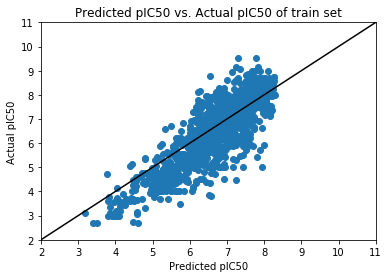

In [8]:
###evaluate the model's performance on train set
from deepchem.utils.evaluate import Evaluator
metric = dc.metrics.Metric(dc.metrics.r2_score)
evaluator = Evaluator(model, train_dataset, transformers)
r2score = evaluator.compute_model_performance([metric])
print(r2score)

### plot of train vs predicted train
predicted_train = model.predict(train_dataset)
true_train = train_dataset.y
plt.scatter(predicted_train, true_train)
plt.xlabel('Predicted pIC50')
plt.ylabel('Actual pIC50')
plt.title(r'Predicted pIC50 vs. Actual pIC50 of train set')
plt.xlim([2,11])
plt.ylim([2,11])
plt.plot([2,11], [2,11], color='k')
plt.show()

computed_metrics: [0.6475795890875848]
{'r2_score': 0.6475795890875848}


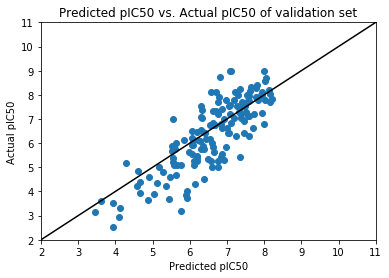

In [9]:
###evaluate the model's performance on validation set
from deepchem.utils.evaluate import Evaluator
metric = dc.metrics.Metric(dc.metrics.r2_score)
evaluator = Evaluator(model, valid_dataset, transformers)
r2score = evaluator.compute_model_performance([metric])
print(r2score)

### plot of train vs predicted valid
predicted_valid = model.predict(valid_dataset)
true_valid = valid_dataset.y
plt.scatter(predicted_valid, true_valid)
plt.xlabel('Predicted pIC50')
plt.ylabel('Actual pIC50')
plt.title(r'Predicted pIC50 vs. Actual pIC50 of validation set')
plt.xlim([2,11])
plt.ylim([2,11])
plt.plot([2,11], [2,11], color='k')
plt.show()

computed_metrics: [0.5999384705399218]
{'r2_score': 0.5999384705399218}


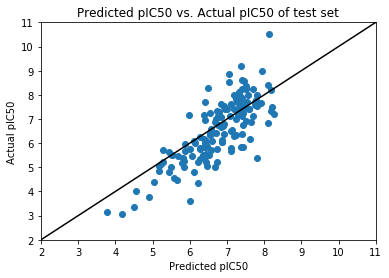

In [10]:
###evaluate the model's performance on test set
from deepchem.utils.evaluate import Evaluator
metric = dc.metrics.Metric(dc.metrics.r2_score)
evaluator = Evaluator(model, test_dataset, transformers)
r2score = evaluator.compute_model_performance([metric])
print(r2score)

### plot of train vs predicted test
predicted_test = model.predict(test_dataset)
true_test = test_dataset.y
plt.scatter(predicted_test, true_test)
plt.xlabel('Predicted pIC50')
plt.ylabel('Actual pIC50')
plt.title(r'Predicted pIC50 vs. Actual pIC50 of test set')
plt.xlim([2,11])
plt.ylim([2,11])
plt.plot([2,11], [2,11], color='k')
plt.show()

In [ ]:
model.model_dir = "./"
model.save()